<a href="https://colab.research.google.com/github/hirossk/shoyo/blob/main/6_Python%E3%81%A7%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%E3%81%AE%E6%BC%94%E7%BF%92%EF%BC%88%E7%9F%B3%E7%8B%A9%E7%BF%94%E9%99%BD%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hirossk/0920shoyo/blob/main/6_Python%E3%81%A7%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%E3%81%AE%E6%BC%94%E7%BF%92%EF%BC%88%E7%9F%B3%E7%8B%A9%E7%BF%94%E9%99%BD%EF%BC%89.ipynb)

# プログラミングでデータ分析基礎

プログラミングによるデータ分析の基礎を学びましょう。

## 独立行政法人 統計センターによる教育用データを使います

教育用標準データセット

https://www.nstac.go.jp/use/literacy/ssdse/


データの解説はこちらを参照してください。

https://www.nstac.go.jp/sys/files/kaisetsu-A-2024.pdf

データの形式は次のようなものになります。

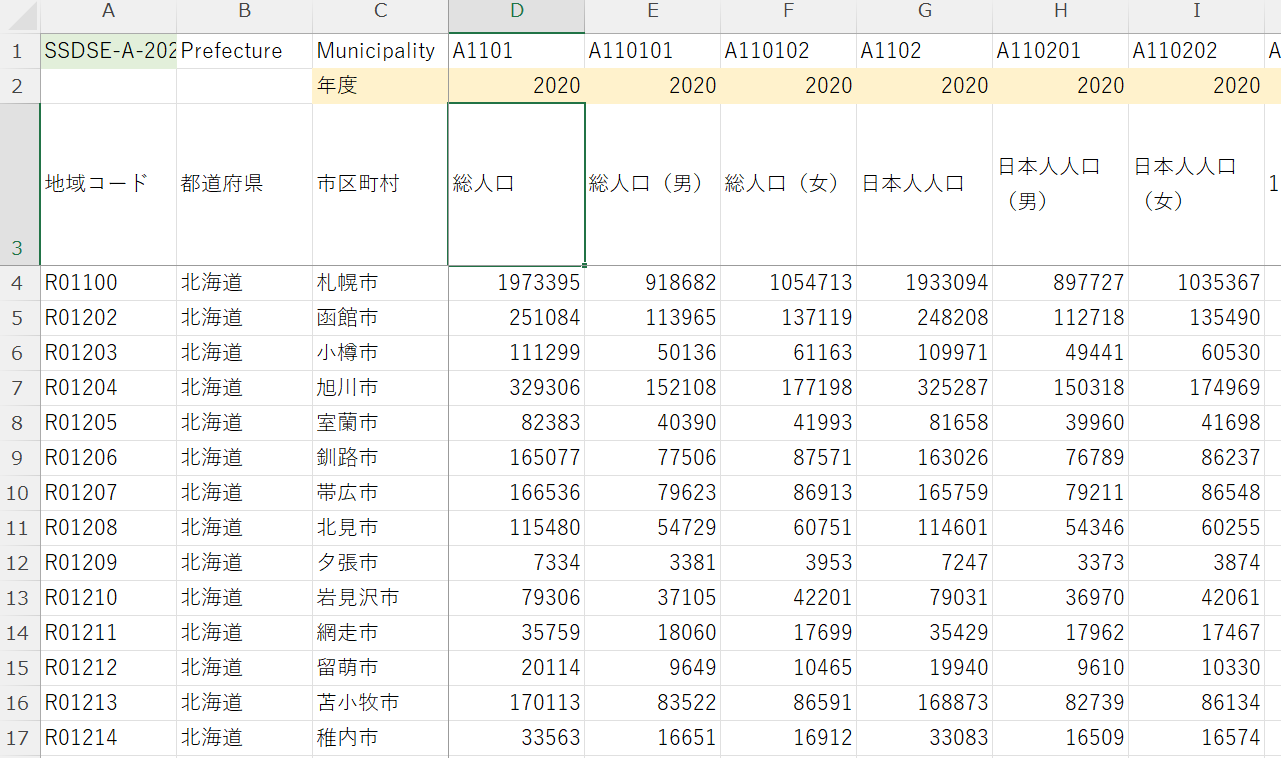

１～２行目の見出しはデータの操作には不要です。

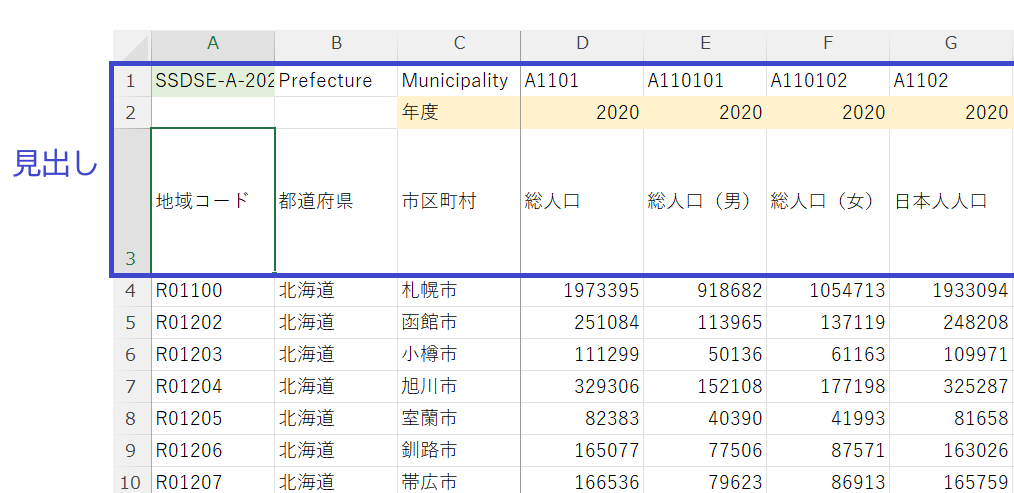

データの本体は「行」といいます。

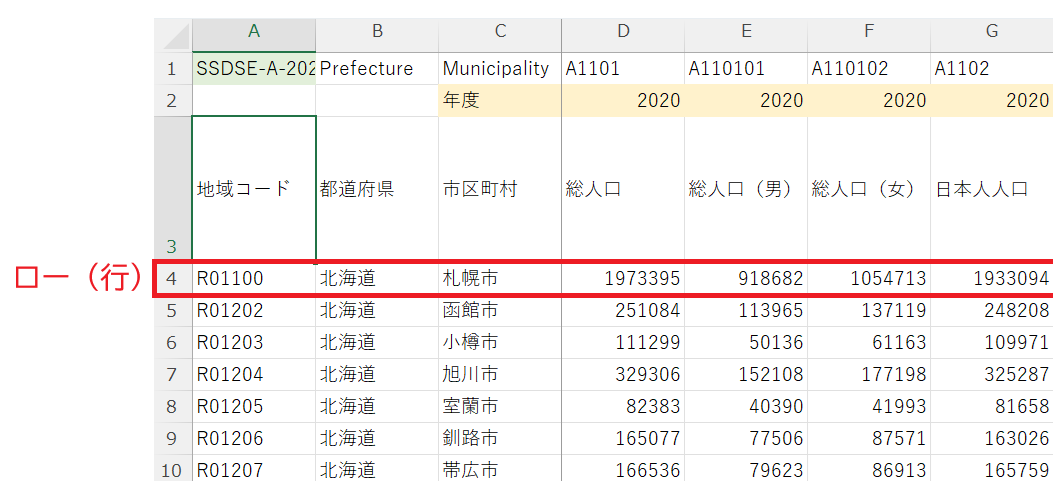

データの項目は「列」といいます。

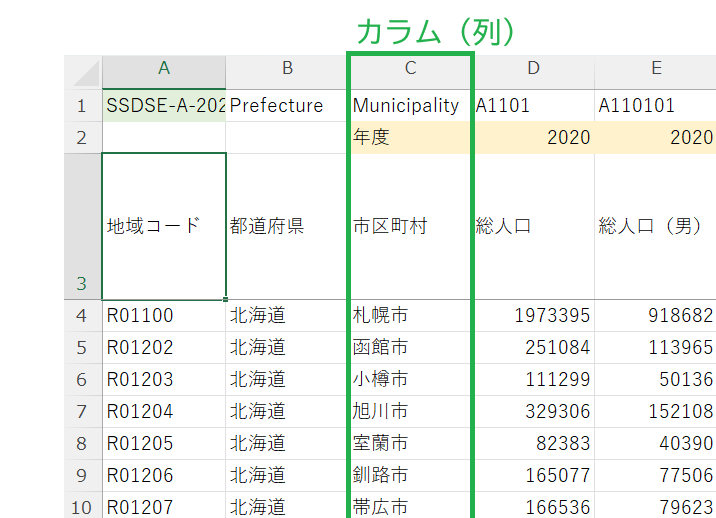

### まずはデータをダウンロードしましょう。

In [ ]:
# データを取得します。
!mkdir  csv

!wget -P csv/ https://www.nstac.go.jp/sys/files/SSDSE-A-2024.csv

# CSVファイルの利用

CSVファイルを簡単に利用するためにはPythonのPandasライブラリを利用します。

Pandasを使うと多種のデータを簡単に加工することができます。

先ほどの「行」「列」を操作するためにpandasによる「データフレーム」を利用することができます。

## グラフを利用するために必要なライブラリのインストール

前回の授業と同様に「japanize_matplotlib」をインストールします。

In [ ]:
# 日本語グラフを表示するために必要なライブラリのインストール
!pip install japanize_matplotlib

import japanize_matplotlib

# 警告を抑制するおまじない
import warnings
warnings.simplefilter('ignore')

## 先ほどダウンロードしたファイルを読み込みます。

「SSDSE-A-2024.csv」ファイルをプログラムに読み込みます。

In [ ]:
import pandas as pd

# csvフォルダーにあるSSDSE-A-2024.csvを読み込みます。
# とりあえず１行目と２行目はスキップします。
df = pd.read_csv('csv/SSDSE-A-2024.csv',encoding = "shift-jis", skiprows=[0,1])

# データが読み込まれたことを確認するために見出しと最初の５行だけ出力します。
print(df.head())

## データ抽出

読み込んだデータから必要なデータを抽出することができます。

様々な条件で抽出できることを確認しましょう。

In [ ]:
# 沖縄県のデータのみ取り出してみます。
print(df[df['都道府県'] == '沖縄県'])

# 北海道のデータのみ取り出してみましょう。
# print(df[df['都道府県'] == ''])

In [ ]:
# 北海道の石狩市のデータのみ取り出してみます。
print(df[(df['都道府県'] == '北海道') & (df['市区町村'] == '石狩市')])

# 北海道・札幌市のデータのみ取り出しましょう。
# print(df[(df['都道府県'] == '') & (df['市区町村'] == '')])

In [ ]:
# 必要なデータ列「都道府県」のみ取り出してみましょう。
print(df[['都道府県']])

# 必要なデータ列の中で複数列('都道府県', '総人口', '15歳未満人口')を取り出してみましょう。
#print(df[['都道府県','総人口']])

In [ ]:
# 組み合わせて北海道の総人口と15歳未満の人口を抽出してみましょう。
print(df[df['都道府県'] == '北海道'][['都道府県', '総人口', '15歳未満人口']] )

# 札幌市の('都道府県', '市区町村', '総人口', '15歳未満人口')を取り出してみましょう。
#print(df[(df['都道府県'] == '') & (df['市区町村'] == '')][['都道府県', '市区町村', '総人口', '15歳未満人口']] )


In [ ]:
# 北海道の市区町村の'総人口'と'15歳未満人口'を抽出したデータを新たな変数df2で扱えるようにしましょう。
df2 = df[df['都道府県'] == '北海道'][['都道府県', '市区町村', '総人口', '15歳未満人口']]

# print(df2)

## データ列の操作

データに新たな列を追加してみましょう。

In [ ]:
# df2に新たな列を追加してみましょう。
# 総人口当たりの15歳未満人口を求めて'若年層割合'を追加します。
df2['若年層割合'] = df2['15歳未満人口'] / df2['総人口']

# print(df2)

## データの操作

データの並べ替えや最大値を求めてみましょう。

In [ ]:
# 若年層割合の昇順で並べ替えします。

df2.sort_values('若年層割合')

In [ ]:
# 若年層割合の降順で並べ替えします。

df2.sort_values('若年層割合', ascending=False)

In [ ]:
# 若年層割合の最も高い市区町村を表示しましょう。
# 市区町村名と若年層割合の出力をしてみましょう。
print(df2[['市区町村', '若年層割合']])

# 若年層割合の最高値を求めましょう。
print(df2['若年層割合'].max())

# データフレームの中で若年層割合の最大値と一致するレコードを取り出しましょう。
print('最大値')
print(df2[['市区町村', '若年層割合']][df2['若年層割合'] == df2['若年層割合'].max()])

# データフレームの中で若年層割合の最小値と一致するレコードを取り出しましょう。
print('最小値')



## データのグラフ化

読み込んだデータで散布図を作ってみましょう。

In [ ]:
# 総人口と若年割合には関連があるのか調べてみましょう。

df2.plot.scatter(x='総人口', y='若年層割合')

### データの操作（外れ値を除く）

外れ値を除いてデータのグラフ化をしてみましょう。

In [ ]:
# 人口の多い都市があると参考になりません。
# 人口の多い市区町村と少ない市区町村を取り除きdf3とします。

df3 = df2[df2['総人口'] < 200000]

# 総人口を50000人未満,10000人よりも多い街のみグラフ化しましょう。
# df3 = df2[(df2['総人口'] < 50000) & (df2['総人口'] > 10000)]
df3.plot.scatter(x='総人口', y='若年層割合')

# 抽出したデータの個数を表示しましょう。
print('該当の市区町村数は',len(df3))


## 回帰分析を行う

散布図から人口と若年層割合の傾向を分析するために回帰分析を行ってみましょう。

In [ ]:
from sklearn import linear_model
import matplotlib.pyplot as plt
# 回帰分析を行うときの準備です
reg = linear_model.LinearRegression()

# sklearnを使う時は、numpy形式に変換する
x = df3.loc[:, ['総人口']].to_numpy()
y = df3.loc[:, ['若年層割合']].to_numpy()
# 回帰分析を実行
reg.fit(x, y)
# 結果の出力
# 回帰係数は１に近いほど関係性がある
print('回帰係数：', reg.coef_)
print('切片：', reg.intercept_)
print('決定係数：', reg.score(x, y))

plt.scatter(x, y)
plt.ylabel('若年層割合')
plt.xlabel('総人口')
plt.plot(x, reg.predict(x))
plt.grid(True)

## 回帰分析とは？

回帰分析は、**「あるものが変わると、別のものがどう変わるかを調べる方法」**です。

たとえば、次のようなことを考えてみましょう。

たくさん勉強するとテストの点数が上がるのか？
身長が高いと、バスケットボールがうまくなるのか？
早く寝ると、次の日元気になるのか？
このように、**「一つのものが変わると、別のものにどんな影響があるか」**を知りたいときに、回帰分析が役立ちます。

回帰分析でわかること
**回帰分析を使うと、次のようなことがわかります。**

* 勉強時間が1時間増えると、テストの点数が何点上がるか？
* 勉強時間が全然ないとき、だいたい何点くらいになるか？

これを使うことで、未来の結果を予測したり、どのくらい頑張れば目標に到達できるかを考えるのに役立てます。

In [ ]:
# データフレームのカラムの一覧を表示しましょう。

print(df.columns.values)

### 回帰係数

回帰係数が直線の傾きを表します。

回帰係数とは何か？

回帰分析では、「回帰係数」という数字を使って、**「何かが1単位変わると、別のものがどれくらい変わるか」**を教えてくれます。

In [ ]:
# 人口が10000以上、50000人以下の40市町村で'総人口'と最も相関関係のあるデータを探してみましょう。

from sklearn import linear_model
import matplotlib.pyplot as plt

column1 = '総人口'
column2 = '総面積（北方地域及び竹島を除く）'

df_enshu = df[(df['総人口'] <= 50000) & (df['総人口'] >= 10000)]
df_enshu.plot.scatter(x='総人口', y='総面積（北方地域及び竹島を除く）')

# 回帰分析を行うときの準備です
reg = linear_model.LinearRegression()

# sklearnを使う時は、numpy形式に変換する
x = df_enshu.loc[:, ['総人口']].to_numpy()
y = df_enshu.loc[:, ['総面積（北方地域及び竹島を除く）']].to_numpy()
# 回帰分析を実行
reg.fit(x, y)
# 結果の出力
print('回帰係数：', reg.coef_)
print('切片：', reg.intercept_)
print('決定係数：', reg.score(x, y))

plt.scatter(x, y)
plt.ylabel('総面積（北方地域及び竹島を除く）')
plt.xlabel('総人口')
# グラフの色を指定します。
plt.plot(x, reg.predict(x), color='red')
plt.grid(True)


## 変数の利用

プログラムを何か所も修正するのは大変なので、総人口と小売店数の関係を簡単にできるようにcolumn1,2という変数で扱えるようにしています。

In [ ]:
# 人口が10000以上、50000人以下の40市町村で'総人口'と最も相関関係のあるデータを探してみましょう。

from sklearn import linear_model
import matplotlib.pyplot as plt

column1 = '総人口'
column2 = '小売店数'

df_enshu = df[(df[column1] <= 50000) & (df[column1] >= 10000)]
df_enshu.plot.scatter(x=column1, y=column2)

# 回帰分析を行うときの準備です
reg = linear_model.LinearRegression()

# sklearnを使う時は、numpy形式に変換する
x = df_enshu.loc[:, [column1]].to_numpy()
y = df_enshu.loc[:, [column2]].to_numpy()
# 回帰分析を実行
reg.fit(x, y)
# 結果の出力
print('回帰係数：', reg.coef_)
print('切片：', reg.intercept_)
print('決定係数：', reg.score(x, y))

plt.scatter(x, y)
plt.ylabel(column2)
plt.xlabel(column1)
# グラフの色を指定します。
plt.plot(x, reg.predict(x), color='red')
plt.grid(True)


# データ分析演習

データを用意して分析の流れを確認しましょう。

## 日付と気温データ

カレンダー上の日付と気温を記録しましょう。

このデータは適当に作ったデータです。


In [ ]:
import pandas as pd

# 日付と気温のデータフレームを作ります
dfdate = pd.DataFrame(columns=['日付', '気温'])
# 日付と気温のデータを追加します
dfdate.loc[1] = ['2024-09-30', 15]
dfdate.loc[2] = ['2024-10-01', 25]
dfdate.loc[3] = ['2024-10-02', 18]
dfdate.loc[4] = ['2024-10-03', 23]
dfdate.loc[5] = ['2024-10-04', 16]
dfdate.loc[6] = ['2024-10-05', 22]
# 作成したデータの確認します。
dfdate


## 日付と商品と売り上げのデータ

カレンダー上の日付と商品と売り上げ（金額）を記録しましょう。

In [ ]:
# 日付と商品の売り上げのデータフレームを作ります
dfitem  = pd.DataFrame(columns=['日付', '商品名', '売上'])
dfitem.loc[1] = ['2024-09-30', 'アイスクリーム', 2000]
dfitem.loc[2] = ['2024-09-30', '肉まん', 1900]
dfitem.loc[3] = ['2024-10-01', 'アイスクリーム', 4000]
dfitem.loc[4] = ['2024-10-01', '肉まん', 800]
dfitem.loc[5] = ['2024-10-02', 'アイスクリーム', 2500]
dfitem.loc[6] = ['2024-10-02', '肉まん', 1500]
dfitem.loc[7] = ['2024-10-03', 'アイスクリーム', 3000]
dfitem.loc[8] = ['2024-10-03', '肉まん', 800]
dfitem.loc[9] = ['2024-10-04', 'アイスクリーム', 2050]
dfitem.loc[10] = ['2024-10-04', '肉まん', 2000]
dfitem.loc[11] = ['2024-10-05', 'アイスクリーム', 2800]
dfitem.loc[12] = ['2024-10-05', '肉まん', 1400]
dfitem.loc[13] = ['2024-10-06', 'アイスクリーム', 2000]
dfitem.loc[14] = ['2024-10-06', '肉まん', 100]
# 作成したデータの確認します。
dfitem

## 気温データと売り上げデータを結合します。

日付と気温と売り上げの関係表を作りましょう。

In [ ]:
# データを結合すると日付と気温と商品の一覧を作成することができる
dfall = dfdate.merge(dfitem)
# マージ（併合といいます）したデータの確認します。
dfall


日付を追加して少しデータの件数を増やしてみましょう。

## 特定の商品（アイスクリーム）のデータフレームを取り出してグラフ化してみましょう。

データの名称はdf_iceとします。

In [ ]:
# アイスクリームのデータフレームだけ取り出します。
df_ice = dfall[dfall['商品名'] == 'アイスクリーム']

# 気温と売り上げの関係をグラフ化します
df_ice.plot.scatter(x='気温', y='売上')

## 特定の商品（肉まん）のデータフレームを取り出してグラフ化してみましょう。

データの名称はdf_meatとします。

In [ ]:
# 肉まんのデータフレームだけ取り出します。
df_meat = dfall[dfall['商品名'] == '肉まん']

# 気温と売り上げの関係をグラフ化します
df_meat.plot.scatter(x='気温', y='売上')


## 回帰分析演習

アイスクリームと肉まんの気温と売り上げの関係を回帰分析しましょう。

最初はアイスクリーム

In [ ]:
from sklearn import linear_model
import matplotlib.pyplot as plt

# 回帰分析の初期化
reg = linear_model.LinearRegression()

# sklearnを使う時は、numpy形式に変換する
x = df_ice.loc[:, ['気温']].to_numpy()
y = df_ice.loc[:, ['売上']].to_numpy()
# 回帰分析を実行
reg.fit(x, y)
# 結果の出力
print('回帰係数：', reg.coef_)
print('切片：', reg.intercept_)
print('決定係数：', reg.score(x, y))

plt.scatter(x, y)
plt.ylabel('気温')
plt.xlabel('売上')
# グラフの色を指定します。
plt.plot(x, reg.predict(x), color='red')
plt.grid(True)

次は肉まん

In [ ]:
from sklearn import linear_model
import matplotlib.pyplot as plt

# 回帰分析の初期化
reg = linear_model.LinearRegression()

# sklearnを使う時は、numpy形式に変換する
x = df_meat.loc[:, ['気温']].to_numpy()
y = df_meat.loc[:, ['売上']].to_numpy()
# 回帰分析を実行
reg.fit(x, y)
# 結果の出力
print('回帰係数：', reg.coef_)
print('切片：', reg.intercept_)
print('決定係数：', reg.score(x, y))

plt.scatter(x, y)
plt.ylabel('気温')
plt.xlabel('売上')
# グラフの色を指定します。
plt.plot(x, reg.predict(x), color='red')
plt.grid(True)

---

# SNSのデータを分析をしてみよう。

次のプログラムを実行するとあるSNSのデータが作成されます。

このデータはあるインフルエンサーの（インスタグラムやX）の閲覧データです。

In [ ]:
# プログラムが何をしているかは後ほど説明します。
import random
import pandas as pd
weekdays = ['月', '火', '水', '木', '金']
weekend_days = ['土', '日']
high_activity_hours = ['18:00', '19:00', '20:00', '21:00', '22:00', '23:00']
hours = ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']

def generate_data(num_records):
    data = {
        '時間': [],
        '曜日': [],
        'インプレッション': [],
        'いいね': [],
        'コメント': [],
        'シェア': []
    }

    days_of_week = weekdays + weekend_days

    for _ in range(num_records):
        day = random.choice(days_of_week)
        hour = random.choice(hours)

        if day in weekend_days and hour in high_activity_hours:
            impressions = random.randint(3000, 10000)
            likes = random.randint(200, 800)
            comments = random.randint(50, 100)
            shares = random.randint(100, 200)
        elif day in weekdays and hour in high_activity_hours:
            impressions = random.randint(2000, 5000)
            likes = random.randint(100, 300)
            comments = random.randint(30, 70)
            shares = random.randint(50, 150)
        else:
            impressions = random.randint(100, 5000)
            likes = random.randint(0, 200)
            comments = random.randint(0, 50)
            shares = random.randint(0, 100)

        data['時間'].append(hour)
        data['曜日'].append(day)
        data['インプレッション'].append(impressions)
        data['いいね'].append(likes)
        data['コメント'].append(comments)
        data['シェア'].append(shares)

    return pd.DataFrame(data)

# 指定した件数のデータ生成
df = generate_data(1000)

# CSVファイルとして保存
file_path = 'csv/sns_sample_data.csv'
df.to_csv(file_path, index=False, encoding='utf-8-sig')



インフルエンサーがSNSデータの分析インプレッション、エンゲージメントについて考えてみましょう。

## SNSの分析

SNS（ソーシャルネットワーキングサービス）を使っていると、「いいね」や「コメント」が気になることがあるかもしれません。それを調べるために使うのが、インプレッションやエンゲージメントです。

### インプレッションって何？

インプレッションは、あなたの投稿がどれだけの人に見られたかを表す数字です。たとえば、100人があなたの投稿を見たら、インプレッションは「100」となります。投稿が人のタイムラインに表示されるたびにカウントされるので、たとえ「いいね」がつかなくても、誰かの目には届いているということがわかります。

### エンゲージメントって何？

エンゲージメントは、人があなたの投稿にどれだけ関わってくれたかを表します。具体的には、次のようなアクションがエンゲージメントにあたります：

```
いいねを押す
コメントを書く
投稿を**シェア（リポスト）**する
などなど
```


## データ分析を始めましょう

まずはデータを確認してみます。

In [ ]:
# 生成したデータを閲覧してみましょう。
df

### データを整理する

与えられたデータを曜日順、時間順に並べ替えると、整理されてわかりやすくなります。

In [ ]:
# 曜日時間順に並べ替えしましょう。
sort_order = ['日', '月', '火', '水', '木', '金', '土']
df['曜日'] = pd.Categorical(df['曜日'], categories = sort_order)

df = df.sort_values(['曜日','時間'])
# ソート済みのデータを確認しましょう。
df

### データの加工

エンゲージメントとは見てもらったSNSのリアクションの合計を言います。

「いいね」＋「コメント」＋「シェア」を「エンゲージメント」として列を追加します。

エンゲージメントを求めるためにdfに「いいね」「コメント」「シェア」の合計として新たな列「エンゲージメント」を作りましょう。


In [ ]:
# 「いいね」「コメント」「シェア」の合計を「エンゲージメント」列として追加しましょう。
# df['エンゲージメント'] = df['いいね'] + df['コメント'] + df['シェア']
# データを閲覧します。
df


### データの可視化（グラフ化）

インプレッションとエンゲージメントを「散布図」にしてみましょう。

In [ ]:
from matplotlib import pyplot as plt

# インプレッションとエンゲージメントのグラフ化（散布図）を行います。
# df.plot(kind='scatter', x='インプレッション', y='エンゲージメント', s=32, alpha=.8)
# plt.gca().spines[['top', 'right',]].set_visible(False)

### グラフの考察

グラフの結果からインプレッションとエンゲージメントの関係を考察してみましょう。


### グラフ表現の変更

グラフを変更することでグラフから読み取ることができる状況が変わることを理解しましょう。

In [ ]:
# 曜日と時間帯とインプレッションの関係をグラフ化しましょう。

# 曜日とインプレッションの散布図を表示します。
df.plot(kind='scatter', x='曜日', y='インプレッション', s=32, alpha=.8)


### グラフ（散布図）の分析

作成された曜日ごとのインプレッションから読み取れることはなんでしょうか？

曜日ごとのグラフは曜日で点を描画するのではなく、データの集計値を使うようにしましょう。

### グラフの最適化

データを分析しやすい積み上げ棒グラフに変更しましょう。


In [ ]:
# 曜日でデータを集計します。
df_dayofweek = df.groupby('曜日').sum()
df_dayofweek = df_dayofweek.drop('時間', axis=1)
# '曜日'をindexからカラムに戻す
df_dayofweek = df_dayofweek.reset_index()

# 曜日集計後のデータ「df_dayofweek」を確認します。
df_dayofweek


In [ ]:
# 集計後のデータを使って棒グラフにします。
df_dayofweek.plot(kind='bar', x='曜日', y='インプレッション')

エンゲージメントを使ってグラフ化してみましょう。

In [ ]:
# 曜日ごとのエンゲージメントの合計を棒グラフにしましょう。
# df_dayofweek.plot(kind='bar', x='曜日', y='エンゲージメント')


### グラフの分析

時間でデータ集計をしてみましょう。

In [ ]:
# 時間ごとにインプレッションの合計を求め棒グラフにしましょう。
df_timerange = df.drop('曜日', axis=1)
df_timerange = df.groupby('時間').sum(numeric_only=True)
# '曜日'をindexからカラムに戻す
df_timerange = df_timerange.reset_index()


In [ ]:
# 集計されたデータを確認してみましょう。
# df_timerange


In [ ]:
# 時間帯ごとの集計値でグラフ化しましょう。
df_timerange.plot(kind='bar', x='時間', y='インプレッション')

### データ分析と考察

インプレッションのグラフとエンゲージメントのグラフを見て気が付いたことはなんでしょうか？

データ分析をする上で今回大切だと気が付いたことは何でしょうか？

# おまけ 消費者物価指数によるデータ分析

消費者物価指数のデータを使ってモノの値段の変化を分析してみましょう。

まずは消費者物価に関するExcelデータを読み込みましょう。

元データはこちらです。

https://www.e-stat.go.jp/stat-search/files?page=1&query=%E6%B6%88%E8%B2%BB%E8%80%85%E7%89%A9%E4%BE%A1&sort=open_date%20desc&layout=dataset&metadata=0&data=1


In [ ]:
!mkdir excel
!wget -P excel/ https://0920shoyo.s3.ap-southeast-2.amazonaws.com/cpi2020comp.xlsx

## Excelデータの読み込み

Excelデータを読み込んでみましょう。

In [ ]:
import pandas as pd

# 2020年基準消費者物価指数 / 月報
df = pd.read_excel('excel/cpi2020comp.xlsx', parse_dates=['年月'])
# データが読み込まれたことを確認するために'年月'と'からあげ'と見出しだけ出力します。
print( df[['年月','からあげ']])
print(df.columns)

時間があるようでしたら、「カステラ」の1970年1月から2024年8月までの物価指数をグラフ化してみましょう。

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime as d

# データフレームから年月と'チョコレート'の列の値を横軸縦軸に取得します。
x = df.loc[:, ['年月']]
y = df.loc[:, ['カステラ']].to_numpy()
print(x)
# x軸の値をデータフレームから年月日に変換します。
x = [d.strptime(x, '%Y年%m月') for x in x['年月']]

plt.plot(x, y)
plt